# Decision Tree Basics
* Decision Trees are quite simple in concept, but quite complicated in implementation 
* This lecture is going to cover the basic concepts, later lectures we will discuss the details
* at its core, you can think of a decision tree as just a bunch of nested if statements
* For example, lets look at our spam classifier again
* A decision tree may look like:

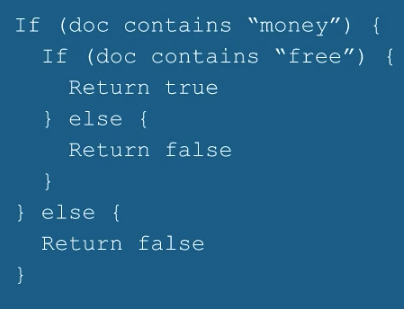

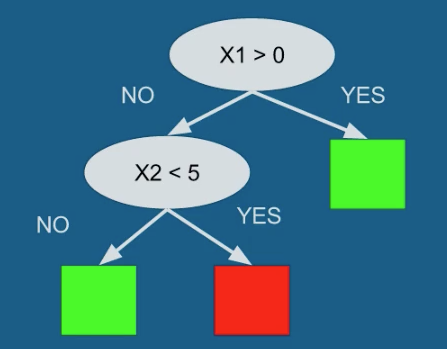

# What makes this machine learning?
* a bunch of if statements doesn't exactly sound very machine learning esque 
* What makes this ML is how we choose the conditions we check in the if statements 
* this is based on information theory 

# One key feature
* decision trees only look at one attribute or aspect at a time 
* in other words each condition checks only 1 column of the X matrix
* Usually we call these **input features**, but they are often called **attributes** when talking about decision trees
* For example, if we are using a persons height to help us make a decision, we may have a condition like:

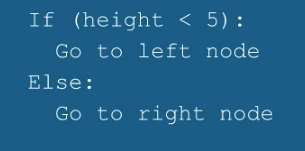

# Geometry 
* What does this tell us about the geometry of the problem?
* Well lets put height on the X1 axis and weight on the X2 axis. 

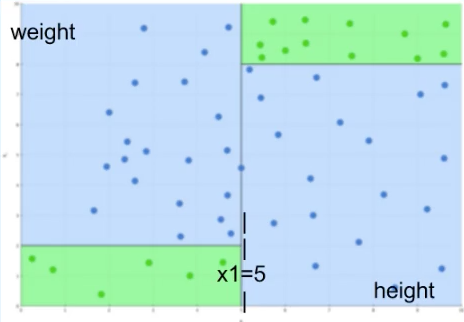 

* We see that if we split on X1=5, then everything to the left of it makes one decision, and everything to the right of it makes another decision 
* So while linear classifiers (discriminating line) can create boundaries that are at arbitrary angles to the axss, decision trees can only separate the data by lines that are orthogonal to the axis
* However, that does not just mean we are limited to one side being one thing, and the other side being another thing
* since we are working with trees now, we can have splits at each level, and thus the final decision boundary learned by a decision tree can be highly nonlinear!

# Recursiveness
* Another aspect of decision trees is that because we are using trees, the problem is inherently recursive
* A TreeNode will have children TreeNodes, and we will chose based on some criteria, which child to go to
* That child will then do the same thing, and chose one of its children to go to
* When we arrive at a leaf node, that is when we will make a prediction
* It then bubbles back up to the root node

# Pseudocode
* First lets pose some limitations on our implementation:
    1. we are only going to do binary classification
    2. each tree will only have 0 or 2 children (only 1 split per node)
    3. If node has children, it does not have prediction function, if node does not have children, it does have prediction function 
    
* lets assume we have an object called **`TreeNode`**, which contains the following:

In [6]:
class TreeNode(object): 
    def __init__(self): 
        self.condition
        self.left_node
        self.right_node
        self.left_prediction
        self.right_prediction

* if the node is not a leaf node, then **`left_node`** and **`right_node`** will also point to tree nodes
* if the node is a leaf node, then **`left_node`** and **`right_node`** will be null, but **`left_prediction`** and **`right_prediction`** will be set to the most likely values
* So the basic algorithm for predicting one sample is:

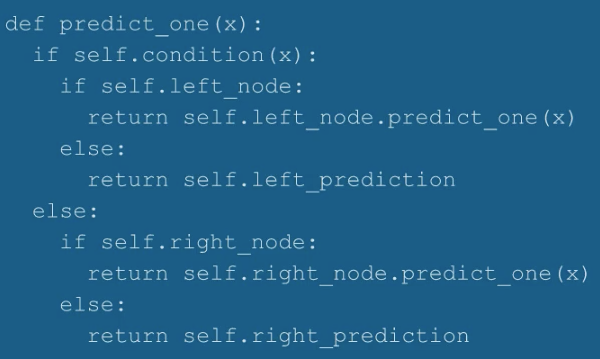

* so first we check the condition on x
* if it is true then we first check if we have a left node 
* if we do have a left node, then we predict one sample on the left node
* otherwise this is a leaf node we return the left prediction 
* we then go to where the condition is not true
* we check to see if we have a right node
* if we do have a right node, we should get the prediction from the right now 
* other wise this is a leaf node, so we should return the right side prediction 

# Notice...
* See how the function we just described above is for predicting one sample? 
* we need to make our predictions for one sample at a time, because the prediction may be true or false depending on which sample we are looking at 
* we will soon discuss how that function is found, and how we can use it to build the fit function which will also be recursive

---
# Information Entropy
* lets now look at the theory behind choosing the best splits in our decision tree
* At a high level we would like to make a split that maximizes the reduction in uncertainty 
* So for example, if there is a split we can make where we go from being 50% certain, to 100% certain, that is going from 50% certain to 75% certain

# Information Entropy
* using information theory, we can quantify this concept
* we use what is called information entropy, and it is related to variance 
* recall that a wider variance means that we don't know much about the data we are going to get 
* A very small variance means we have more confidence about the specific values of the data 

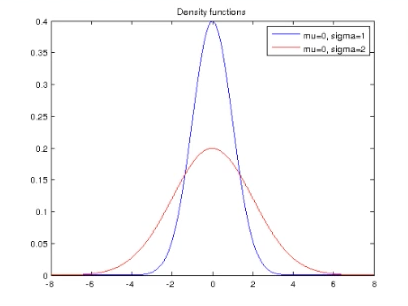

* Now the equation for information entropy is:

### $$Entropy = E[-p(x)log_2\Big(p(x)\Big)]$$

* so we can see that it uses the probability distribution over x, just like variance 
* we can also see that it must be positive or 0, since p(x) must always be between 0 and 1, and the negative log of a number between 0 and 1, is greater than or equal to zero 
* Note that when dealing with entropy, we usually mean log base 2 implicitly 

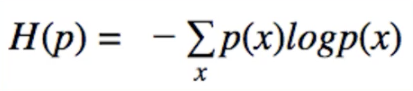

# Binary Random Variable
* Lets consider a binary variable specifically (we will call it X)
* Lets that that the probability that X = 1 is 
### $$P(X=1) = p$$
* and that 
### $$P(X=0) = 1 - p$$ 
* The equation for entropy thus becomes: 
### $$H(p) = -plog(p) - (1-p)log(1-p)$$
* the question that we want to ask here is: What is the value of p that maximizes the entropy?
* to find this value we can take the derivative of h wrt p, set it equal to 0, and solve for p
### $$\frac{dH}{dp}$$
* doing this yield the answer that 
### $$p = 0.5$$
* if we were to plot H(X) vs P(x) we would see that H = 0 when p = 0 or 1
* and H is 1 when p = 0.5, which is the peak of H

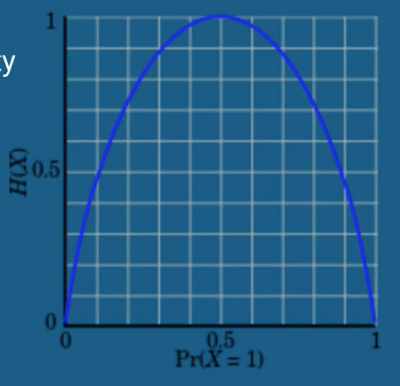

* Now we can start thinking about the meaning of entropy
* if the probability of a binary variable is 0.5, then there is **no possible way for you to make a good prediction about it**
* no matter what you predict, you will have a 50% chance of being wrong
* Lets consider a value other than 0.5, lets say p = 0.8
* if we wanted to predict the value of this random variable, we should always predict 1, because that gives us the best chance of being correct 
* Entropy is a measure of how much information we get from knowing (finding out) the value of a random variable 

# Example
* If we flip a coin with p = 0.8 probability of heads, and we get heads (1), we don't gain that much information, we were already 80% certain that we would flip heads
* However, if we flip a coin with p = 0.5 probability of heads, and we get heads, we gain the maximum amount of information we could have
* this is because prior to knowing, we were maximally clueless about the value we would get! 
* In general, the probability distribution that yields the maximum entropy is the uniform distribution  

# Intuition
* at this point you should be starting to think about how we may be able to use this...
* It would make sense that we try and create each node to maximize the amount of information gained

# Maximizing Information Gain 
* how will we use information entropy to help us choose the best attributes in our data? 
* We will NOT do ID3 (which is generally the most popular version to teach)

# ID3 overview
* We would like to find the attribute that best splits the data based on having the max information gain 
* once we make that split, we never use that attribute again
* All of the children nodes will have to chose maximum information gain, based on the rest of the attributes given the split of data
* The splits that occur in the ID3 algorithm do not have to be binary, however ours will be 
* For example, one attribute could be a dice roll, which can take on the values from 1 to 6. Hence the node could have 6 children 

# Our Version
* We are going to implement a different version, with regards to these two implementation details
* First, we will not require that an attribute can only be split once 
* from a geometric point of view, this would allow us to go from green to purple and back to green, then purple
* As an example, this would be useful for the donut problem!
* We can see that we used two green splits and two purple splits below
* This allows us to place the smaller circle in the center square

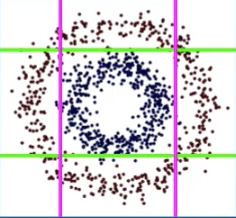

* Another reason we will be splitting the same attribute more than once is because each tree node is going to have 2 children 
* This will make things much easier when we looking at the MNIST data set, which we are treating as continuous data
* This allows us to simply specify a threshold at which to split left and right, rather than having a different child for all 256 discrete values

# What is information Gain?
* now that we know the best algorithm, choose the best attribute based on information gain, how do we actually calculate information gain
* For this, the main piece of information we are interested in is the labels 
* First consider the full data set. Suppose half of the data is from class 1, and half of the data is from class 0
    * 0, 0, 1, 1 
* In this case our entropy is 1
### $$H(Y) = 1$$
* next, suppose we have an input attribute that perfectly splits the data 
    * E.g. if X < 0, Y = 0, if X > 0, Y = 1
* Well of course we should split on this attribute because it gives us a perfect classifier with 100% accuracy!
* Now the entropy for the left child is 0, and the entropy for the right child is 0 (i.e. the entropy for each subset of the data is 0)
* The toal information gain is:
### $$Information \; Gain(Y|split\;on\;X) = H(Y) - 0.5*H(Y_{left}) - 0.5*H(Y_{right}) = 1 - 0.5*0 - 0.5*0 = 1 $$
* Our final information gain is 1, which is the maximum amount that we can get 
* The 0.5 means half the data went to the left, half went to the right 

# A more realistic example
* data is not always this nice! 
* more likely than not, after the split, data will still remain misclassified 
* Lets go through an example with two inputs, X1 and X2 
* here is our data:

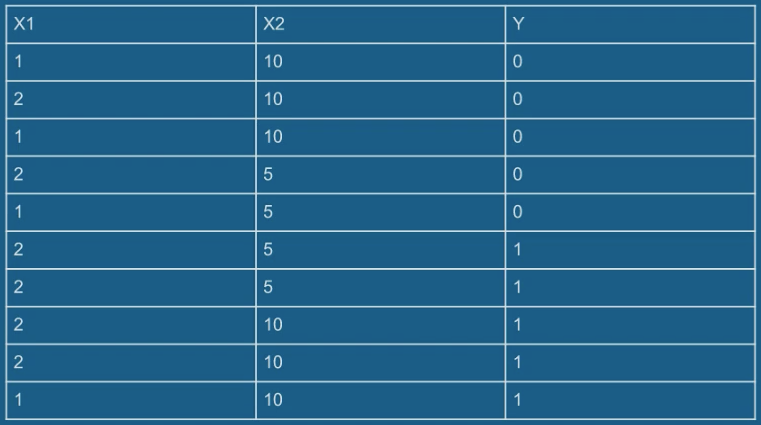

* first, we can clearly see here that the entropy of Y is 1, because we have a 50% chance of being 0, and a 50% chance of being 1
### $$Entropy = H(Y) = 1$$
* now if split X1 between 1 and 2, we need to consider the subset of data where X1 is 1, and we need to consider the subset of data where X1 is 2 
### X1 = 1

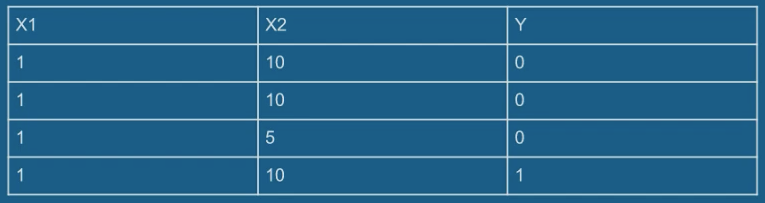

* We can see that the entropy of Y, for X1 = 1 is: 
### $$H(Y|X_1=1) = -0.75log(0.75) - 0.25log(0.25) = 0.811$$

### X1 = 2 

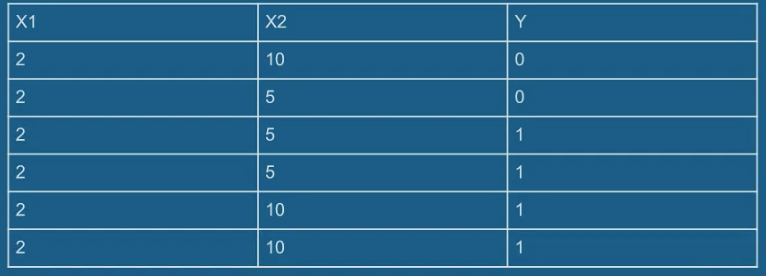

* We can see that the entropy of Y, for X1 = 2 is:
### $$H(Y|X_1=2) = \frac{-1}{3}log(\frac{1}{3}) - \frac{2}{3}log(\frac{2}{3}) = 0.918$$

* So what does this mean?
* well if we split on X1, our information gain is:
### $$IG = 1 - \frac{4}{10}(0.811) - \frac{6}{10}(0.918) = 0.1248$$
* Notice that each child nodes entropy's get multiplied by the proportion of data it received 
* This ensures that the information gain is always greater than 0

### Repeat for X2
* we now will repeat this for X2
* we need to consider the rows for which X2 is 5 and X2 is 10

### X2 = 5

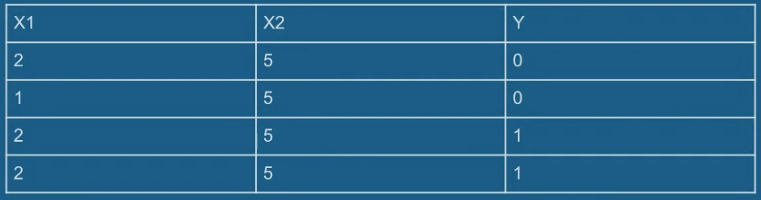

* So, the entropy of Y, for X2 = 5 is 1
### $$H(Y|X_2=5) = 1$$

### X2 = 10

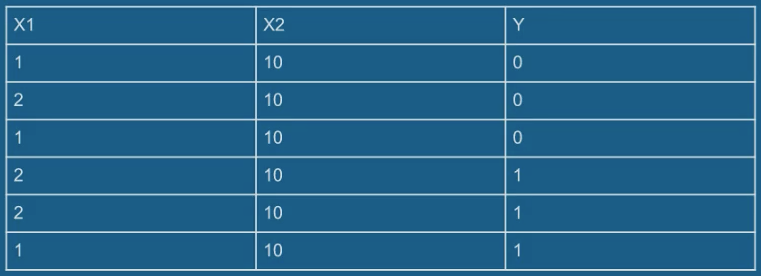

* So, the entropy of Y, for X2 = 10 is 1
### $$H(Y|X_2=10) = 1$$

* So the total information gain by splitting on X2 is:
### $$IG = 1 - \frac{4}{10}(1)-\frac{6}{10}(1) = 0$$

* Therefore, by splitting across the X2 column, we gain nothing 
* hence we should not split across this column
* Instead we should split on X1!

# Pseudocode

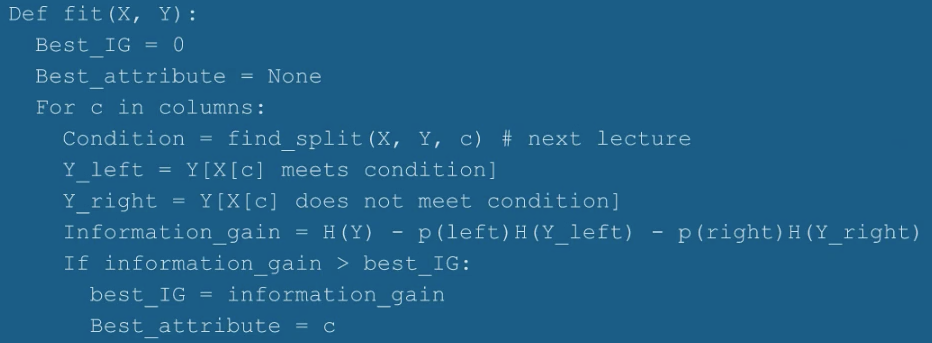

* We want to find the best information gain, and the best attribute that gives us the best information gain
* so we loop through all of the columns
    * split the data to find the condition 
    * find the Y which goes on the left node
    * Find the Y which goes on the right node
    * calculate the information gain
    * if this is better than our current best, we set this to our current best
    ### In our example above:
        * we looped through both columns (X1 and X2)
        * then in the case of X1 we split the data at X1 = 5
        * we grabbed the cases where X1 =5 and we placed them on the left node (calculate entropy)
        * we grabbed the cases where X1 != 5 and we placed them on the right node (calculate entropy)
        * we then calculated the information gain, using the entropy from the left and right node

* But there is still more work to do...

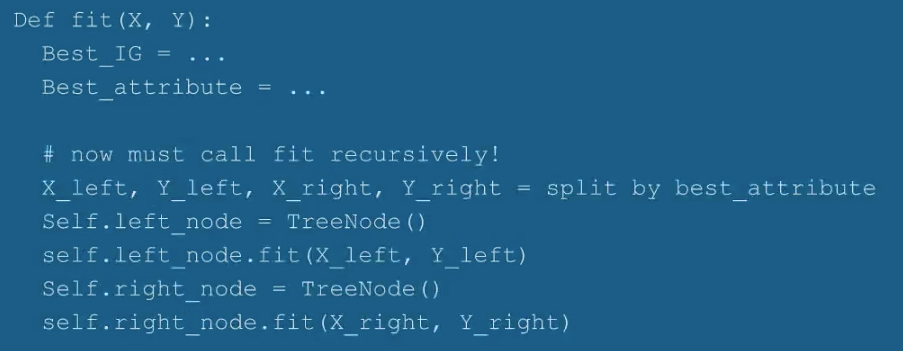

* once we have found the best attribute to split on, we split up the data into the left subtable and right subtable
* then we create a tree node for the left child and for the right child 
* And we fit those nodes to their corresponding data 

# Base cases
* one thing that is missing is that we did not check for base cases 
* these are needed when doing recursion 
* First base case: if information gain is 0, we gain nothing from splitting (nothing we can do to increase the accuracy), so we should just make this a leaf node! 
* if this is a leaf node then we should just take the most likely class (i.e. if there are more 1s than 0s in our subset of data, predict 1)

# More base cases
* there are still a few more base cases to consider 
* one thing that we want to avoid is overfitting 
* you can imagine that with a decision tree of arbitrary depth, we could easily get 100% training accuracy 
* but this may not lead to good generalization on the test data 
* one way to avoid this is to limit the maximum depth of the decision tree
* whenever we hit the maximum depth, we simply stop recursing, and make the current node a leaf node 
* therefore we must always tell a TreeNode what its current depth is, and what the max depth is

# Final base cases (trivial)
* if there is only one sample, there can only be 1 prediction, so we predict whatever the label for that sample is
* if we have more than one sample, but they are all the same class, then we should still predict whatever that label is 